Accuracy: 0.8624982046248862
Classification Report:
              precision    recall  f1-score   support

          -1       0.83      0.75      0.79      4473
           0       0.84      0.94      0.89      7404
           1       0.90      0.85      0.88      9010

    accuracy                           0.86     20887
   macro avg       0.86      0.85      0.85     20887
weighted avg       0.86      0.86      0.86     20887

Confusion Matrix:
[[3377  490  606]
 [ 221 6949  234]
 [ 488  833 7689]]


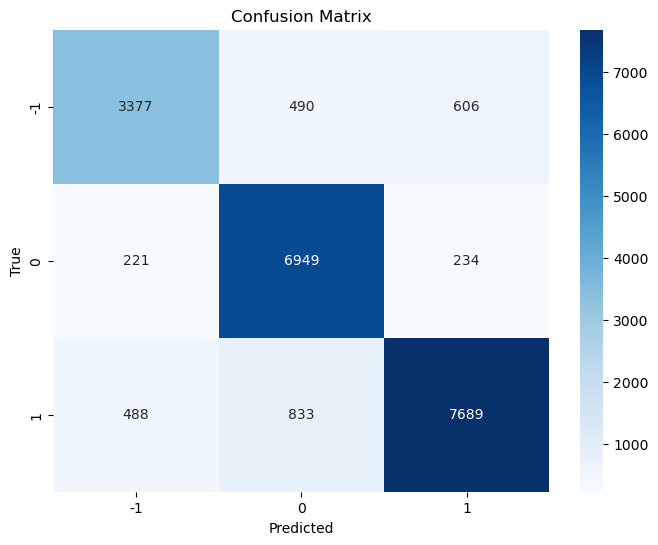

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
bjp_data = pd.read_csv('bjp_final.csv')

# Replace NaN values in 'clean_text' column with an empty string
bjp_data['clean_text'] = bjp_data['clean_text'].fillna('')

# Split the data into features (X) and labels (y)
X = bjp_data['clean_text']
y = bjp_data['category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Choose a machine learning model (SVM)
svm_classifier = SVC(kernel='linear', C=1.0, probability=False)
svm_classifier.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}\nClassification Report:\n{report}\nConfusion Matrix:\n{conf_matrix}')

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Accuracy: 0.6897119341563785
Classification Report:
              precision    recall  f1-score   support

          -1       0.65      0.42      0.51       246
           0       0.67      0.73      0.70       406
           1       0.71      0.78      0.74       563

    accuracy                           0.69      1215
   macro avg       0.68      0.64      0.65      1215
weighted avg       0.69      0.69      0.68      1215

Confusion Matrix:
[[104  56  86]
 [ 19 296  91]
 [ 37  88 438]]


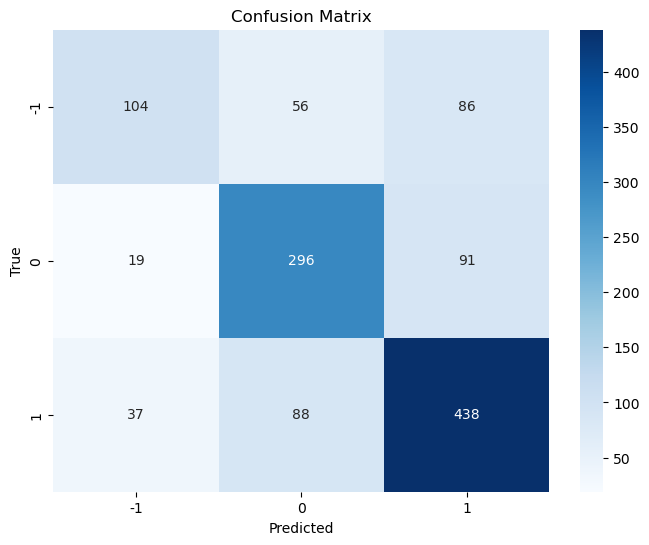

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
cong_data = pd.read_csv('congress_final.csv')

# Replace NaN values in 'clean_text' column with an empty string
cong_data['clean_text'] = cong_data['clean_text'].fillna('')

# Split the data into features (X) and labels (y)
X = cong_data['clean_text']
y = cong_data['category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Choose a machine learning model (SVM)
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}\nClassification Report:\n{report}\nConfusion Matrix:\n{conf_matrix}')

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### ROC Curve BJP

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
bjp_data = pd.read_csv('bjp_final.csv')

# Replace NaN values in 'clean_text' column with an empty string
bjp_data['clean_text'] = bjp_data['clean_text'].fillna('')

# Split the data into features (X) and labels (y)
X = bjp_data['clean_text']
y = bjp_data['category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Choose a machine learning model (SVM) with probability estimates
svm_classifier = SVC(kernel='linear', C=1.0, probability=True)
svm_classifier.fit(X_train_vectorized, y_train)

# Obtain probability estimates for the positive class
y_prob = svm_classifier.predict_proba(X_test_vectorized)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Make predictions
y_pred = svm_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}\nClassification Report:\n{report}\nConfusion Matrix:\n{conf_matrix}')

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Print the AUC value
print(f'AUC: {roc_auc}')
